<a href="https://colab.research.google.com/github/RahafSh/EDA_Online-Retail/blob/main/Week03Task_RahafShiqdar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Online Retail II UCI** `Week 03 Task`

###Course End Project: Data Analysis Module
###Exploratory Data Analysis - Our chosen dataset
####*Rahaf Shiqdar - Atheer Alessa*
----
##**Learning Objectives:**


* Dataet Overview
  1.  Data Loading and Initial Exploration
  2.  Data Cleaning
  3.  Exploratory Data Analysis
  4.  Feature Engineering
  5.  Conclusion

* Save Cleaned Data and Download it
---

#**Dataset Overview**
This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011. The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

-	Dataset contain 1 csv files.
-	Online file include 8 column and 1067371 rows.

**Loading the dataset from Kaggle website:**  [Click here](https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci)

In [ ]:
##Import libraries & packages - Python

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization
from sklearn.preprocessing import LabelEncoder
from scipy import stats


from google.colab import drive
drive.mount('/content/drive')
# magic command that allows plots generated by matplotlib to be displayed directly within the notebook
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  1.  Data Loading and Initial Exploration


      •	Load the selected dataset into  your preferred data analysis environment.


In [ ]:
#Load the dataset & Use the Pandas method read_csv() to load the data from the csv file.
online = pd.read_csv("/content/drive/MyDrive/online_retail_II.csv", encoding='latin-1', low_memory = False)

      •	Explore the structure of the dataset (number of rows and columns, data types, etc.).


Understanding the dataset

In [ ]:
online.shape

(1067371, 8)

In [ ]:
online.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

      •	Examine the first few rows of the dataset to understand its contents.


In [ ]:
#Use the method head() to display the first five rows of the dataframe, but we can spcify a number also like here I choose 2!
online.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [ ]:
online.tail(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [ ]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


##  2.  Data Cleaning

      •	Handle missing values appropriately (e.g., imputation, deletion, etc.).


In [ ]:
# Change DType

online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])
online['Customer ID'] = online['Customer ID'].astype('object')


In [ ]:
# Encoding datetime column (extracting features like year, month, day, etc.)
online['year'] = online['InvoiceDate'].dt.year
online['month'] = online['InvoiceDate'].dt.month
online['day'] = online['InvoiceDate'].dt.month

online['year'] = online['year'].astype('object')
online['month'] = online['month'].astype('string')
online['day'] = online['day'].astype('string')

# Displaying the DataFrame after encoding datetime features
print("\nDataFrame after encoding datetime features:")
print(online)


DataFrame after encoding datetime features:
        Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price Custome

In [ ]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   object        
 7   Country      1067371 non-null  object        
 8   year         1067371 non-null  object        
 9   month        1067371 non-null  object        
 10  day          1067371 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 89.6+ MB


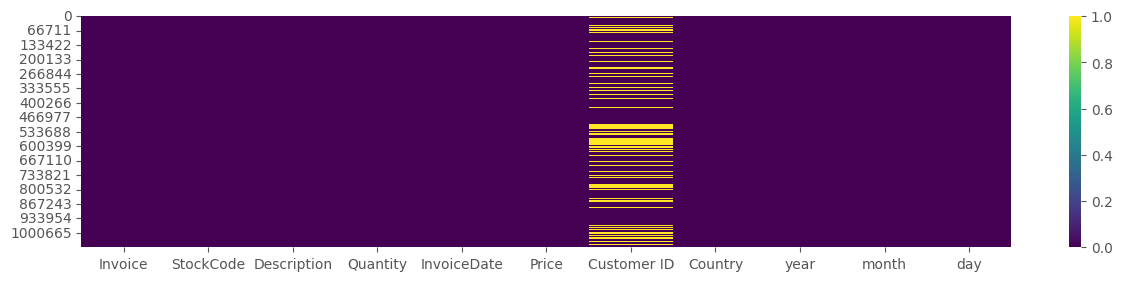

In [ ]:
# Check if there is any missing value through plot!
plt.rcParams['figure.figsize']=(15,3)
plt.style.use('ggplot')
sns.heatmap(online.isnull(), cmap='viridis') # I couldn't do it on the merged table it crashed for huge data!
plt.show()

In [ ]:
online.isnull().sum().sum()

247389

In [ ]:
online.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
year                0
month               0
year_month          0
dtype: int64

In [ ]:
online = online.dropna(subset=["Customer ID"])

      •	Check for and handle any duplicate entries.



In [ ]:
print('Duplicate entries: {}'.format(online.duplicated().sum()))

Duplicate entries: 26479


In [ ]:
online.drop_duplicates(inplace = True)

In [ ]:
online.duplicated().sum()

0

In [ ]:
online.isnull().sum().sum()

0

In [ ]:
online.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
year           0
month          0
day            0
dtype: int64

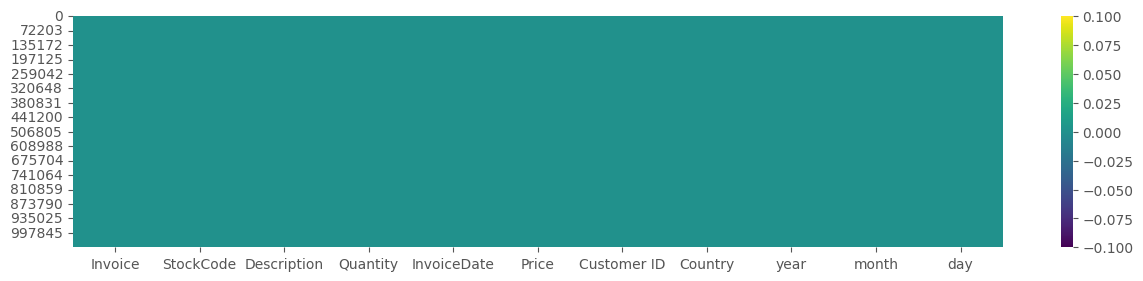

In [ ]:
# Check if there is any missing value through plot!
plt.rcParams['figure.figsize']=(15,3)
plt.style.use('ggplot')
sns.heatmap(online.isnull(), cmap='viridis') # I couldn't do it on the merged table it crashed for huge data!
plt.show()

We do not have any duplicate rows in our dataset.



In [ ]:
online.shape

(797885, 8)

 ## 3.  Exploratory Data Analysis


In [ ]:
sns.set(rc={'axes.facecolor':'#e9f1f2','figure.facecolor':'#fcf3dc'});

      •	Conduct univariate analysis to understand the distribution of individual variables.


Data Analysis and Visualization


Text(0.5, 1.0, 'Invoices by Country')

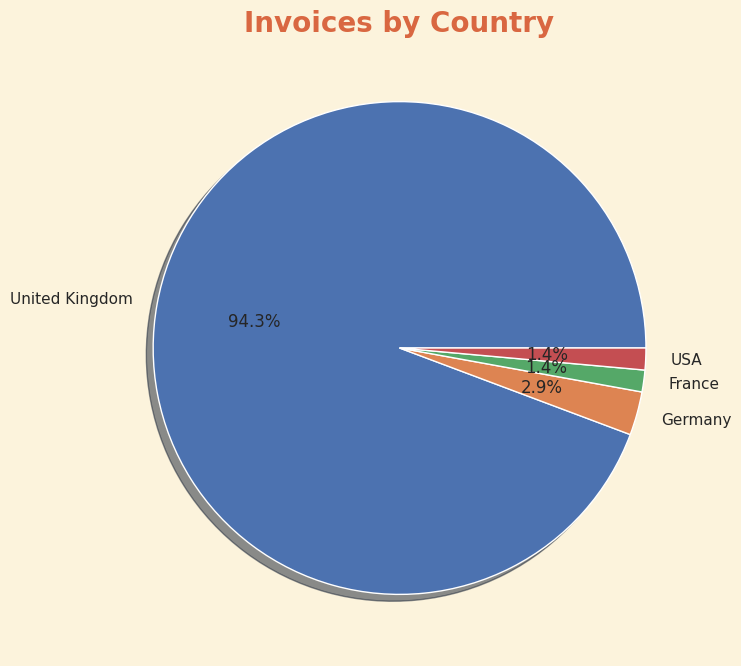

In [ ]:
# Pie Chart
sample = online.sample(n=70,random_state=42)
P = sample.Country.value_counts()/sample.shape[0]
plt.figure(figsize=[10, 8])
plt.pie(P ,labels=P.index,autopct='%1.1f%%',shadow=True)
plt.title('Invoices by Country',fontsize=20, color='#d96741', weight='bold')

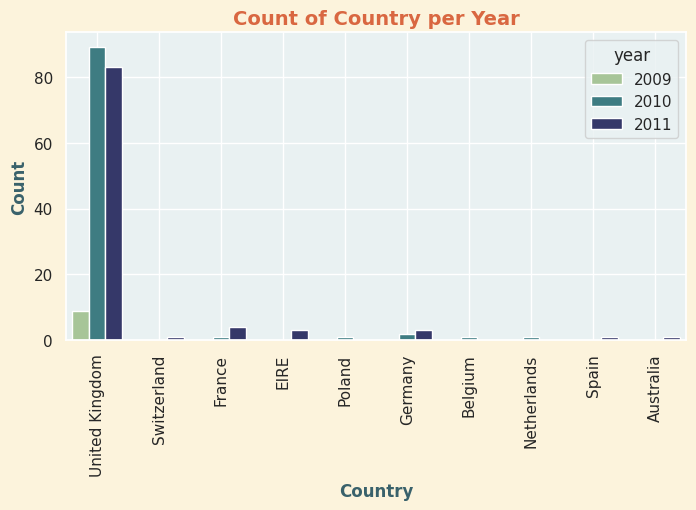

In [ ]:
# Grouped Countplot for a categorical variable (e.g., Country)
sample = online.sample(n=200,random_state=40)
plt.figure(figsize=(8, 4))
sns.countplot(data=sample, x='Country', hue='year', palette='crest', legend=True)

plt.title('Count of Country per Year', fontsize=14, fontweight='bold', color='#d96741',weight="bold")
plt.xlabel('Country', fontsize=12, color='#39616b',weight="bold")
plt.ylabel('Count', fontsize=12, color='#39616b',weight="bold")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

      •	Perform bivariate analysis to explore relationships between variables (e.g., price vs. Describtion)


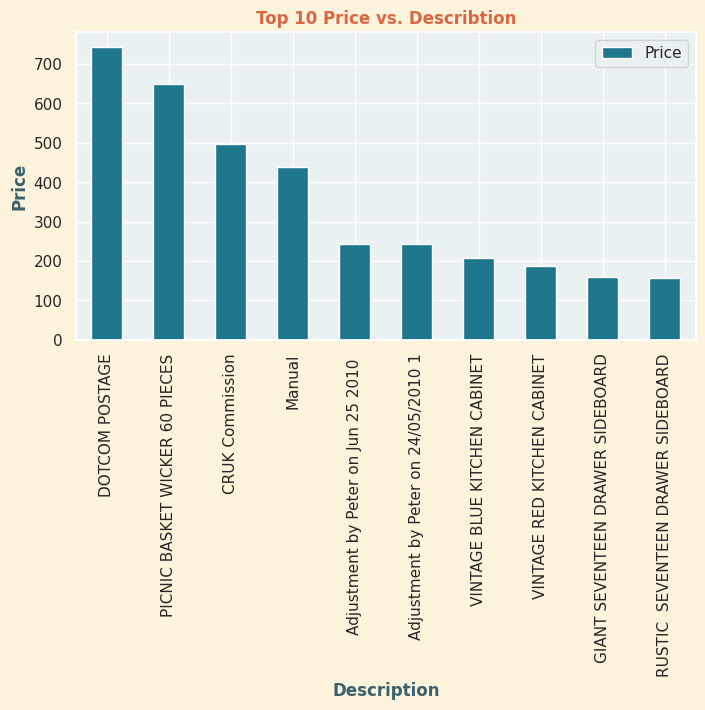

In [ ]:
# Bar Chart
plt.figure(figsize=(8, 4))

online.groupby(['Description'])['Price'].mean().sort_values(ascending=False)[:10].plot.bar(color='#1d768c')
plt.title('Top 10 Price vs. Describtion', color='#d96741',weight="bold")
plt.ylabel('Price', color='#39616b',weight="bold")
plt.xlabel('Description', color='#39616b',weight="bold")
plt.legend().set_visible(True)


      •	Visualize the data using appropriate plots (e.g., histograms, box plots, scatter plots, etc.).



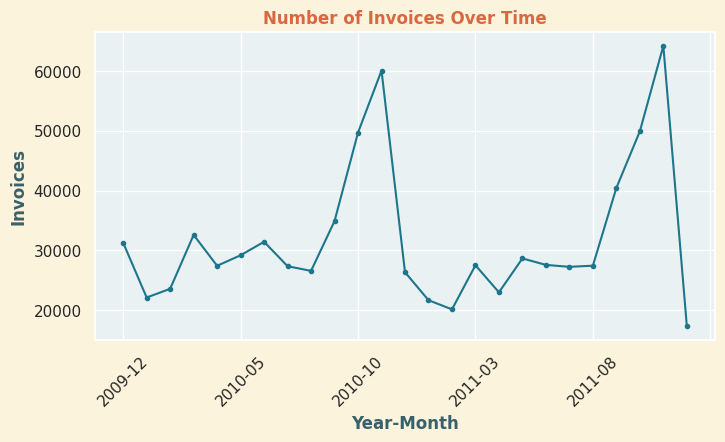

In [ ]:
# Line Plot
# Combine host_year and host_month into year_month column
online['year_month'] = online['year'].astype(str) + '-' + online['month'].astype(str).str.zfill(2)

# Count the hosts joined each month
invoice_per_month = online['year_month'].value_counts().sort_index()

# Plot the trend of hosts joining
plt.figure(figsize=(8, 4))
invoice_per_month.plot(kind='line', marker='.', color='#1d768c')
plt.title('Number of Invoices Over Time', color='#d96741', weight='bold')
plt.xlabel('Year-Month', color='#39616b', weight='bold')
plt.ylabel('Invoices', color='#39616b', weight='bold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


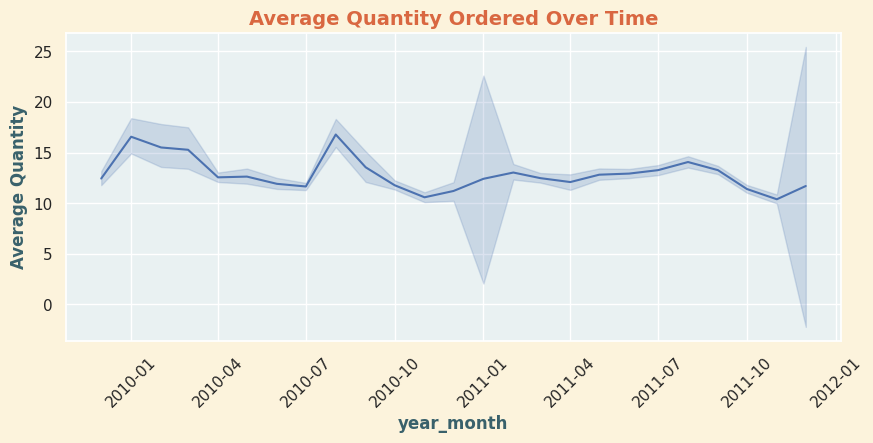

In [ ]:
# Line Plot
plt.figure(figsize=(10, 4))

sns.lineplot(data=online, x='year_month', y='Quantity')

plt.title('Average Quantity Ordered Over Time', fontsize=14, color='#d96741', weight='bold')
plt.xlabel('year_month', fontsize=12, color='#39616b', weight='bold')
plt.ylabel('Average Quantity', fontsize=12, color='#39616b', weight='bold')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines for better readability
plt.show()


      •	Calculate summary statistics for relevant variables.




In [ ]:
online.describe()

,Quantity,Price,year,month
count,797885.000000,797885.000000,797885.000000,797885.000000
mean,12.602980,3.702732,2010.431108,7.411434
std,191.670371,71.392549,0.568904,3.424495
min,-80995.000000,0.000000,2009.000000,1.000000
25%,2.000000,1.250000,2010.000000,5.000000
50%,5.000000,1.950000,2010.000000,8.000000
75%,12.000000,3.750000,2011.000000,10.000000
max,80995.000000,38970.000000,2011.000000,12.000000


 ## 4.  Feature Engineering


      •	Create new features that might be useful for analysis


In [ ]:
online["TotalPrice"] = online["Quantity"] * online["Price"]

In [ ]:
len(online[online["TotalPrice"]<0]) # no 0 amount in data

19498

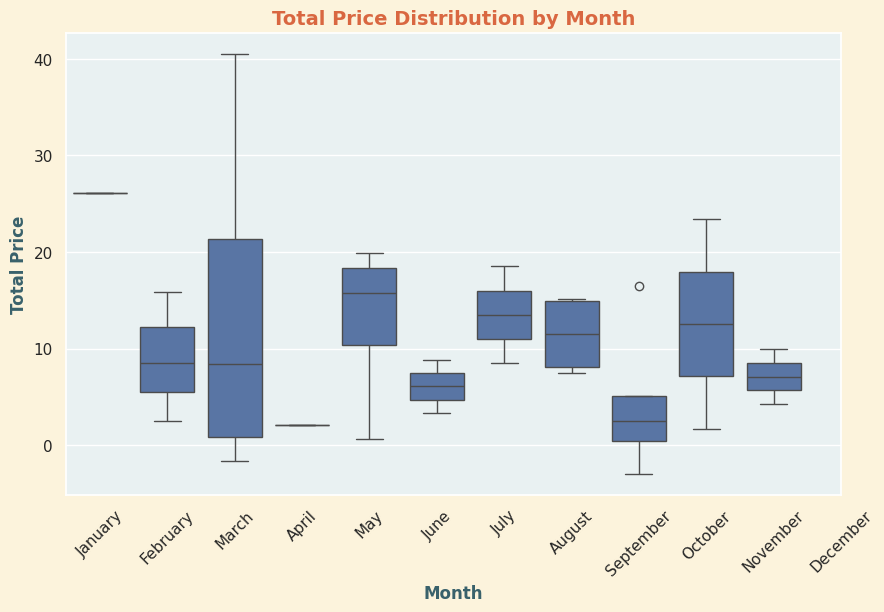

In [ ]:
import calendar

# Create a list of month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='TotalPrice', data=sample)
plt.xticks(ticks=range(12), labels=month_names, rotation=45)  # Set month names as x-axis labels
plt.title('Total Price Distribution by Month', fontsize=14, color='#d96741', weight='bold')
plt.xlabel('Month', fontsize=12, color='#39616b', weight='bold')
plt.ylabel('Total Price', fontsize=12, color='#39616b', weight='bold')
plt.show()


# **Save Cleaned Data and Download it**

In [ ]:
import pandas as pd

Airbnb.to_csv('Airbnb_New.csv', index=False)

#**Conclusion**

* Highest country by invoices total (2009-2011): United Kingdom (94%), Germany (2.9%), France and USA tied at 1.4% each.
* United Kingdom had best sales in 2010 and 2011.
* Most expensive products: Dotcom postage, followed by picnic basket wicker 60 pieces.
* Peak invoice months: October 2010 (highest), August 2011 (over 60,000 invoices).
* Average quantity per order ranged between 10 and 18 over time.

